# XGBoost - LB 0.40+ CV 0.40+ Train With Kaggle Data!
# Download 5000 Single Point Mutations and 200 PDB Files!
In notebook version 15 (and 14), we show you how to process Kaggle's train data and train a model using Kaggle's train data. This is an exciting accomplishment. Currently, as of today, all public notebooks better than LB 0.200 **do not use** Kaggle train data. Instead they use models and techniques from the internet to predict mutation stability. In this notebook we use only Kaggle train and achieve LB 0.35+

The notebook you are reading is the first notebook to use only Kaggle train data and score over LB 0.200! (Specifically, it achieves LB 0.359 single model, woohoo!). Many Kagglers have contributed to making this a success! Including Robert Hatch, GreySnow, Rope on Mars, Vladimir Slaykovskiy, Jinyuan Sun, Kaggleqrdl, Lucas Morin, Moth! It is quite tricky to utilize Kaggle's train data. The process is explained in detail [here][5] and summarized in the diagram below:

![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Oct-2022/k_train3.png)

In previous notebook versions, we built a pipeline to train XGB using features extracted from protein sequence and structure. Also in previous notebook versions, we demonstrated how to download and use external data. In notebook version 13 we added transformer embedding features. In notebook version 11, we download 5000 Single Point Mutations and 200 PDB files from Jinyuan Sun's GitHub [here][1] and discussion [here][4]. We then train a model to predict `dTm` from single point mutations with `dTm` targets and achieve 5-Fold CV Spearman correlation coefficient 0.26 on `dTm`. Next we use this model to predict a holdout dataset's `ddG` and achieve Spearman correlation coefficient 0.26 on `ddG`. Finally we predict Kaggle's test data using this model and achieve LB 0.192. In notebook version 12, we train with both dTm and ddG targets (mixed together) and achieve dTm CV 0.194, ddG CV 0.460, LB 0.209. Notebook version 13 achieves single model LB 0.3! In notebook version 13, we submit the ensemble of versions 8, 11, 12, and 13 and achieve LB 0.34!

An advantage of dowloading data is that we can train with PDB files and then utilize Kaggle's PDB test file during inference. But note we train with PDB files from Protein Data Bank and Kaggle provides PDB file from Alpha Fold for inference. These PDB files were **not** created in the same way. See discussion [here][2]. In order to have inference match training, we load our own test data wild type PDB file created from the internet as described [here][3]. This new PDB file has `b_factor` more similar to the real `b_factor` that we train on. However `atom_df` rows containing Hydrogen atoms are still different (between AlphaFold PDBs and Protein Data Bank PDBs), so be careful with feature engineering. If we submit this real `b_factor` (which isn't Alpha Fold's `pLDDT`) it scores LB 0.139 by itself. Our XGB model achieves a better LB, so it means that our model is learning something!

![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Oct-2022/t_model.png)

# Notes
This notebook is a work in progress. The most helpful aspects of this notebook is that it shows (1) how to use Kaggle's train data, (2) how to extract features from ESM transformer, and (3) how to download 5000 more mutations from the internet and their corresponding 200 PDB files. Specifically 4000 of these mutations, have `ddG` targets and 1000 of these mutations have `dTm` targets. We must decide how to best use this external data and the two types of targets. Furthermore we must be careful training with Protein Data Bank PDB and inferring with AlphaFold PDB. 

* **Versions 1-6** use Kaggle's PDB with `b_factor` column different than Protein Data Bank's PDB `b_factor` column, so we can ignore those `submission.csv`.
* **Version 7 LB 0.146** trains/KFold-validates on `ddG` and holdout-validates on `dTM` and uses an updated PDB for inference with a `b_factor` column that is similar to training data. However many features still do not transfer well from train PDB to infer PDB because the Protein Data Bank's PDB `atom_df` dataframe excludes many hydrogen atoms. Therefore feature engineering needs to be updated. We need to only use rows with `atom_name` isin `['N','H','CA','O']` when counting atoms and/or creating features from `x_coord`, `y_coord`, `z_coord`. (Discussion [here][2])
* **Version 8 LB 0.173** trains/Kfold-validates on `dTm` and holdout-validates on `ddG`. Uses correct `b_factor` in both train and infer. Uses features that don't work well for train and infer (because of atom PDB differences). Furthermore Version 8 model scores LB 0.173 by itself, but Version 8 notebook submits a 50/50 ensemble of version 7 and version 8 which has benefits of train on both `ddG` and `ddT` and achieves LB 0.196.
* **Version 9-11 LB LB 0.192**  trains/Kfold-validates on `dTm` and holdout-validates on `ddG`. Achieves CV 0.260 on both targets. Uses features that exclude hydrogen atoms in PDB since Alpha Fold PDB `atom_df` contains more hydrogen atom rows than corresponding Protein Data Bank PDBs. Also uses features that should be stable between train and test. 
* **Version 12 LB 0.209** trains/Kfold-validates on all 5000 mutations! It trains with mixture of rank normalized `dTm` and `ddG` targets. Achieves CV 0.194 on `dTM` proteins and CV 0.460 on `ddG` proteins. Uses same features as versions 9-11 (but more train data and both targets). Furthermore Version 12 model scores LB 0.209 by itself, but Version 12 notebook submits a 33/33/33 ensemble of version 8, 11, 12 and achieves LB 0.298 woohoo!
* **Version 13 LB 0.300** trains/Kfold-validates on all 5000 mutations! It trains with mixture of rank normalized `dTm` and `ddG` targets. Achieves CV 0.233 on `dTM` proteins and CV 0.619 on `ddG` proteins. Amazing `ddG` CV score! Uses same features as versions 12-13 and adds additional transformer embedding features. Furthermore Version 14 model scores LB 0.300 by itself! but Version 14 notebook submits a 50/50 ensemble of version 12 and 14 and achieves LB ???
* **Version 14 LB 0.307** Woohoo! We finally trained a model and achieved a good CV LB using only Kaggle train data. This is a huge milestone which took collaboration from many Kagglers and 2 weeks of time. This single model achieves CV 0.34 LB 0.31. The LB score posted on version 14 is better than 0.31 because it is the ensemble of notebook version 14 with previous notebook versions 13, 12, 11, 8, and 7. Each previous version adds diversity by training with different data and/or features.
* **Version 15 LB 0.359** In version 15 we add ESM transformer mutation probability and mutation entropy features. We also add protein surface area feature from Rope on Mars described [here][6]. This boosts single model train with only Kaggle train data to CV 0.35 LB 0.36! The LB score for notebook 15 is better than LB 0.36 because notebook version 15 submits an ensemble of notebook versions single models from 15, 14, 13, 12, 11, 8 and 7.
* **Version 16 LB 0.397** Notebook version 16 achieves LB 0.397 single model training will all Jin external data (and no Kaggle data). It uses all our new features including surface area features, ESM mutation probabilities, and ESM mutation entropy. Notebook version 16 shows a better LB score than 0.397 because it submits an ensemble of single models from versions 16, 15, 14, 12, 12, 11, 8, and 7.
* **Version 17 LB 0.415** Inspired by Juan Smith Perera's notebook [here][7], notebook version 17 adds substitution matrix features from four Blosum matrices and one DeMaSk matrix. This boosts single model performance to LB 0.415 woohoo!
* **Version 18** Stay tuned for more versions...

[1]: https://github.com/JinyuanSun/mutation-stability-data
[2]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356920
[3]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356182#1968210
[4]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356182
[5]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/358320
[6]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/357899#1986149
[7]: https://www.kaggle.com/code/jsmithperera/chris-deotte-s-5000x200-blosum100-lb-0-406

In [1]:
# DEFINE WHAT TO TRAIN WITH (and KFOLD VALIDATE) VERSUS HOLDOUT VALIDATE WITH
# ADD WORDS "kaggle.csv", "jin_tm.csv", "jin_train.csv", "jin_test.csv" to lists below
# IF YOU ADD MORE DATASETS, ADD THOSE WORDS TOO

KFOLD_SOURCES = ['jin_tm.csv','jin_train.csv','jin_test.csv']
HOLDOUT_SOURCES = ['kaggle.csv']

# IF WILD TYPE GROUP HAS FEWER THAN THIS MANY MUTATION ROWS REMOVE THEM
EXCLUDE_CT_UNDER = 25

# IF WE TRAIN WITH ALPHA FOLD'S PDBS WE MUST INFER WITH "PLDDT = TRUE"
# KAGGLE.CSV USES ALPHA FOLD PDB, SO SET BELOW TO TRUE WHEN TRAIN WITH KAGGLE.CSV
# JIN.CSV EXTERNAL DATA USES PROTEIN DATA BANK, SO SET BELOW TO FALSE WITH JIN DATA
USE_PLDDT_INFER = False

# IF WE WISH TO TRAIN WITH MIXTURE OF ALPHA FOLD AND PROTEIN DATA BANK PDB FILES
# THEN WE CAN EXCLUDE B_COLUMN AND THEN THERE IS NO PROBLEM
USE_B_COLUMN = False

VER = 17

# Download 3 External Mutation CSV
We download three external datasets from Jinyuan sun GitHub [here][1] with discussion [here][2]

[1]: https://github.com/JinyuanSun/mutation-stability-data
[2]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356182

In [2]:
import os, numpy as np, gc, seaborn as sns
from scipy.stats import spearmanr, pearsonr, rankdata
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)

In [3]:
os.system('wget https://raw.githubusercontent.com/JinyuanSun/mutation-stability-data/main/train.csv')
os.system('wget https://raw.githubusercontent.com/JinyuanSun/mutation-stability-data/main/test.csv')
os.system('wget https://raw.githubusercontent.com/JinyuanSun/mutation-stability-data/main/tm.csv')
os.system('mkdir downloaded_csv; mv *csv downloaded_csv')

--2022-10-26 19:01:19--  https://raw.githubusercontent.com/JinyuanSun/mutation-stability-data/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003314 (980K) [text/plain]
Saving to: ‘train.csv’

     0K .......... .......... .......... .......... ..........  5% 10.9M 0s
    50K .......... .......... .......... .......... .......... 10% 15.8M 0s
   100K .......... .......... .......... .......... .......... 15% 30.1M 0s
   150K .......... .......... .......... .......... .......... 20% 80.2M 0s
   200K .......... .......... .......... .......... .......... 25% 28.7M 0s
   250K .......... .......... .......... .......... .......... 30% 34.5M 0s
   300K .......... .......... .......... .......... .......... 35%  136M 0s
   350K .......... ........

256

In [4]:
df = pd.read_csv('downloaded_csv/train.csv')
df = df.iloc[:,1:]
print('Downloaded train shape', df.shape )
df.head()

Downloaded train shape (3839, 7)


,PDB,wildtype,position,mutation,ddG,sequence,mutant_seq
0,1A5E,L,121,R,0.66,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...
1,1A5E,L,37,S,0.71,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGASPNAPNSYGR...
2,1A5E,W,15,D,0.17,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...,MEPAAGSSMEPSADDLATAAARGRVEEVRALLEAGALPNAPNSYGR...
3,1A5E,D,74,N,-2.00,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...
4,1A5E,P,81,L,0.00,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...,MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGR...


In [5]:
df2 = pd.read_csv('downloaded_csv/test.csv')
df2 = df2.iloc[:,1:]
print('Downloaded test shape', df2.shape )
df2.head()

Downloaded test shape (259, 7)


,PDB,wildtype,position,mutation,ddG,sequence,mutant_seq
0,2PTL,L,24,A,-2.939771,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...,ENKEETPETPETDSEEEVTIKANAIFANGSTQTAEFKGTFEKATSE...
1,2PTL,F,36,A,-4.851816,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEAKGTFEKATSE...
2,2PTL,A,51,G,-3.274379,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...
3,2PTL,V,65,A,-1.099426,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...
4,2PTL,I,74,V,-0.167304,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...,ENKEETPETPETDSEEEVTIKANLIFANGSTQTAEFKGTFEKATSE...


In [6]:
df3 = pd.read_csv('downloaded_csv/tm.csv')
df3 = df3.iloc[:,1:]
print('Downloaded tm shape', df3.shape )
df3.head()

Downloaded tm shape (998, 7)


,PDB,WT,position,MUT,dTm,sequence,mutant_seq
0,1CQW,V,245,L,2.1,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
1,1CQW,L,95,V,-0.4,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
2,1CQW,C,176,F,5.2,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
3,1CQW,G,171,Q,3.1,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
4,1CQW,T,148,L,1.1,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...


# Transform Kaggle Train Data into Mutation CSV
Kaggle's `train.csv` cannot be used as is. Each row has one protein. Instead we need to convert the dataframe where each row has one wild type protein and one single point mutation protein and target `dTm` (i.e. delta `Tm`). Then we can more readily train with the data to predict Kaggle's `test.csv`. This is explained in discussion [here][1].

Robert Hatch has processed the train data and found pairs of wild type and mutation in his notebook [here][2] with discussion [here][3]. We will load his output. GreySnow has made 73 of 78 train's wild type protein PDB's available in his dataset [here][7] with discussion [here][4] using code from Vladimir [here][5] and [here][6]. We will load his output.

Note that Robert finds 4195 pairs (in Kaggle train data) which include 78 wild types. We will filter this below. From each group involving one wild type, we will only keep the rows from the most common `data_source` and `pH` pair. Furthermore, we remove rows belonging to a single `data_source` `pH` pair where all `Tm` targets are the same. And we remove 4 out of 78 groups where GreySnow and Vladimir did not find the PDB file. We saved our processed mutation CSV as `kaggle_train.csv` so you can use it in other notebooks.

[1]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/358320
[2]: https://www.kaggle.com/code/roberthatch/novo-train-data-contains-wildtype-groups/notebook
[3]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/358156
[4]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/359284
[5]: https://www.kaggle.com/code/vslaykovsky/nesp-alphafold-v2-exact-match-data
[6]: https://www.kaggle.com/code/vslaykovsky/nesp-alphafold2-all-close-matches
[7]: https://www.kaggle.com/datasets/shlomoron/train-wildtypes-af

In [7]:
# https://www.kaggle.com/code/roberthatch/novo-train-data-contains-wildtype-groups/notebook
kaggle = pd.read_csv('../input/novo-train-data-contains-wildtype-groups/train_wildtype_groups.csv')
print('Before processing Robert dataframe shape:', kaggle.shape )
kaggle.head()

Before processing Robert dataframe shape: (4195, 8)


,seq_id,protein_sequence,pH,data_source,tm,x,group,wildtype
0,18020,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2.0,10.1021/bi00535a054,38.1,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
1,18021,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,4.2,NaN,53.3,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
2,18022,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2.0,10.1038/334406a0,38.1,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
3,18023,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,6.5,10.1038/334406a0,62.9,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
4,18060,MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2.0,NaN,41.9,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...


In [8]:
kaggle['id'] = kaggle.data_source.astype('str') + '_' + kaggle.pH.astype('str') + '_' + kaggle.group.astype('str')
kaggle['ct'] = kaggle.groupby('id').id.transform('count')
kaggle['n'] = kaggle.groupby('id').tm.transform('nunique')
kaggle = kaggle.loc[kaggle.n>1]
kaggle = kaggle.sort_values(['group','ct'],ascending=[True,False])
KEEP = kaggle.groupby('group').id.agg('first').values
kaggle = kaggle.loc[kaggle.id.isin(KEEP)]

def find_mut(row):
    mut = row.protein_sequence
    seq = row.wildtype
    same = True
    for i,(x,y) in enumerate(zip(seq,mut)):
        if x!=y: 
            same = False
            break
    if not same:
        row['WT'] = seq[i]
        row['position'] = i+1
        row['MUT'] = mut[i]
    else:
        row['WT'] = 'X'
        row['position'] = -1   
        row['MUT'] = 'X'     
    return row

grp = [f'GP{g:02d}' for g in kaggle.group.values]
kaggle['PDB'] = grp
kaggle = kaggle.apply(find_mut,axis=1)
kaggle = kaggle.loc[kaggle.position!=-1]
kaggle['base'] = kaggle.groupby('group').tm.transform('mean')
kaggle['dTm'] = kaggle.tm - kaggle.base
kaggle = kaggle.rename({'wildtype':'sequence','protein_sequence':'mutant_seq'},axis=1)
COLS = ['PDB','WT','position','MUT','dTm','sequence','mutant_seq']
kaggle = kaggle[COLS]

# https://www.kaggle.com/datasets/shlomoron/train-wildtypes-af
alphafold = pd.read_csv('../input/train-wildtypes-af/alpha_fold_df.csv')
dd = {}
for s in kaggle.sequence.unique():
    tmp = alphafold.loc[alphafold.af2_sequence==s,'af2id']
    if len(tmp)>0: c = tmp.values[0].split(':')[1]
    else: c = np.nan
    dd[s] = c
    
kaggle['CIF'] = kaggle.sequence.map(dd)
kaggle = kaggle.loc[kaggle.CIF.notnull()].reset_index(drop=True)
kaggle.to_csv('kaggle_train.csv',index=False)
print('After processing Robert dataframe shape:', kaggle.shape )
kaggle.head()

After processing Robert dataframe shape: (1737, 8)


,PDB,WT,position,MUT,dTm,sequence,mutant_seq,CIF
0,GP01,T,95,C,1.297838,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
1,GP01,T,95,C,0.097838,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
2,GP01,T,95,S,2.297838,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
3,GP01,T,95,S,3.697838,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
4,GP01,T,104,C,2.397838,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1


# Combine 4 CSV Files

In [9]:
df['source'] = 'jin_train.csv'
df['dTm'] = np.nan
df['CIF'] = None
df2['source'] = 'jin_test.csv'
df2['dTm'] = np.nan
df2['CIF'] = None

df3 = df3.loc[~df3.PDB.isin(['1RX4', '2LZM', '3MBP'])].copy()
df3['source'] = 'jin_tm.csv'
df3['ddG'] = np.nan
df3['CIF'] = None
df3 = df3.rename({'WT':'wildtype','MUT':'mutation'},axis=1)
df3 = df3[df.columns]

kaggle['source'] = 'kaggle.csv'
kaggle['ddG'] = np.nan
kaggle = kaggle.rename({'WT':'wildtype','MUT':'mutation'},axis=1)
kaggle = kaggle[df.columns]

df = pd.concat([df,df2,df3,kaggle],axis=0,ignore_index=True)
del df2, df3, kaggle
print('Combined data shape',df.shape)
df.to_csv(f'all_train_data_v{VER}.csv',index=False)
df = df.loc[df.source.isin(KFOLD_SOURCES+HOLDOUT_SOURCES)]
print('Kfold plus Holdout shape',df.shape)
df = df.sort_values(['PDB','position']).reset_index(drop=True)
df.head()

Combined data shape (6809, 10)
Kfold plus Holdout shape (6809, 10)


,PDB,wildtype,position,mutation,ddG,sequence,mutant_seq,source,dTm,CIF
0,1A43,G,9,A,-1.0,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,TSILDIRQAPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,jin_train.csv,NaN,None
1,1A43,E,12,D,-2.1,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,TSILDIRQGPKDPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,jin_train.csv,NaN,None
2,1A43,R,20,A,-3.0,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,TSILDIRQGPKEPFRDYVDAFYKTLRAEQASQEVKNWMTETLLVQN...,jin_train.csv,NaN,None
3,1A43,W,37,A,-0.7,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNAMTETLLVQN...,jin_train.csv,NaN,None
4,1A43,C,71,S,-2.3,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...,jin_train.csv,NaN,None


# Download 200 PDB Files

In [10]:
print('There are',df.PDB.nunique(),'PDB files to download')

There are 290 PDB files to download


In [11]:
# THE FOLLOWING PROTEINS SEQUENCES CANNOT BE ALIGNED BETWEEN CSV AND PDB FILE (not sure why)
bad = [f for f in df.PDB.unique() if len(f)>4]
bad += ['1LVE', '2IMM', '2RPN', '1BKS', '1BLC', '1D5G', '1KDX', '1OTR', '3BN0', '3D3B', '3HHR', '3O39']
bad += ['3BDC','1AMQ','1X0J','1TPK','1GLM','1RHG','3DVI','1RN1','1QGV'] 
bad += ['1SVX','4E5K'] 
print(f'We will ignore mutations from {len(bad)} PDB files')

We will ignore mutations from 32 PDB files


In [12]:
os.system('mkdir downloaded_pdb')
for p in [f for f in df.PDB.unique() if f not in bad]:
    if p[:2]=='GP': continue # skip kaggle CIF
    os.system(f'cd downloaded_pdb; wget https://files.rcsb.org/download/{p}.pdb') 

--2022-10-26 19:01:24--  https://files.rcsb.org/download/1A43.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.158.70
Connecting to files.rcsb.org (files.rcsb.org)|128.6.158.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1A43.pdb’

     0K .......... .......... .......... .......... ..........  319K
    50K .......... .......... ..                               42.6M=0.2s

2022-10-26 19:01:25 (463 KB/s) - ‘1A43.pdb’ saved [74439]

--2022-10-26 19:01:25--  https://files.rcsb.org/download/1A5E.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.158.70
Connecting to files.rcsb.org (files.rcsb.org)|128.6.158.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1A5E.pdb’

     0K .......... .......... .......... .......... ..........  322K
    50K .......... .......... .......... .......... ..........  645K
   100K .......... ..

# Feature Engineer
Below is 3D plot of Kaggle's test data protein structure from PDB file rendered by py3Dmol (with docs [here][1]). For each of our 5000 mutation downloaded train data, we also have protein structure since we downloaded 200 PDB files from Protein Data Bank. And when using Kaggle train data, we now have PDB files! Therefore when we feature engineer, we can create features from both protein sequence, protein structure, and amino acids. In this notebook, we use the following features:
* Protein Structure features (from atom positions in PDB file)
* Protein Sequence features
* Amino Acid features 
* Substitution matrix features
* Transformer ESM embeddings

thanks @kaggleqrdl for his ESM starter notebook [here][2]

[1]: https://3dmol.csb.pitt.edu/doc/$3Dmol.GLViewer.html
[2]: https://www.kaggle.com/code/kaggleqrdl/esm-quick-start-lb237

## Protein Structure Features
We add handcrafted structure features such as amino acid distance to center of protein and the amino acid angle with its two neighbors. In notebook versions 15+ we add amino acid surface area features provided and explained by Rope on Mars [here][1].

[1]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/357899

In [13]:
!pip install py3Dmol -q
import py3Dmol 
with open("../input/novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb") as ifile:
    protein = "".join([x for x in ifile])
#view = py3Dmol.view(query='pdb:1DIV', width=800, height=600)
view = py3Dmol.view(width=800, height=600) 
view.addModelsAsFrames(protein)
style = {'cartoon': {'color': 'spectrum'},'stick':{}}
view.setStyle({'model': -1},style) 
view.zoom(0.12)
view.rotate(235, {'x':0,'y':1,'z':1})
view.spin({'x':-0.2,'y':0.5,'z':1},1)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Amino Acid Features
For amino acid features, we use the CSV provided by Moth @alejopaullier [here][1]. Lucas Morin shows their usefulness [here][2]

[1]: https://www.kaggle.com/datasets/alejopaullier/aminoacids-physical-and-chemical-properties
[2]: https://www.kaggle.com/code/lucasmorin/nesp-changes-eda-and-baseline

In [14]:
# BIOPANDAS PDB READER
!pip install biopandas -q
from biopandas.pdb import PandasPdb
from biopandas.mmcif import PandasMmcif
aa_map = {'VAL': 'V', 'PRO': 'P', 'ASN': 'N', 'GLU': 'E', 'ASP': 'D', 'ALA': 'A', 'THR': 'T', 'SER': 'S',
          'LEU': 'L', 'LYS': 'K', 'GLY': 'G', 'GLN': 'Q', 'ILE': 'I', 'PHE': 'F', 'CYS': 'C', 'TRP': 'W',
          'ARG': 'R', 'TYR': 'Y', 'HIS': 'H', 'MET': 'M'}
aa_map_2 = {x:y for x,y in zip(np.sort(list(aa_map.values())),np.arange(20))}
aa_map_2['X'] = 20

# https://www.kaggle.com/datasets/alejopaullier/aminoacids-physical-and-chemical-properties
aa_props = pd.read_csv('../input/aminoacids-physical-and-chemical-properties/aminoacids.csv').set_index('Letter')
PROPS = ['Molecular Weight', 'Residue Weight', 'pKa1', 'pKb2', 'pKx3', 'pl4', 
         'H', 'VSC', 'P1', 'P2', 'SASA', 'NCISC']
print('Amino Acid properties dataframe. Shape:', aa_props.shape )
aa_props.head(22)

Amino Acid properties dataframe. Shape: (22, 21)


,Name,Abbr,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pKa1,pKb2,pKx3,pl4,H,VSC,P1,P2,SASA,NCISC,carbon,hydrogen,nitrogen,oxygen,sulfur
Letter,,,,,,,,,,,,,,,,,,,,,
A,Alanine,Ala,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,NaN,6.00,0.62,27.5,8.1,0.046,1.181,0.007187,3,7,1,2,0
C,Cysteine,Cys,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,5.07,0.29,44.6,5.5,0.128,1.461,-0.036610,3,7,1,2,1
D,Aspartic acid,Asp,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,2.77,-0.90,40.0,13.0,0.105,1.587,-0.023820,4,7,1,4,0
E,Glutamic acid,Glu,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,3.22,-0.74,62.0,12.3,0.151,1.862,0.006802,5,9,1,4,0
F,Phenylalanine,Phe,165.19,C9H11NO2,C9H9NO,147.18,1.83,9.13,NaN,5.48,1.19,115.5,5.2,0.290,2.228,0.037552,9,11,1,2,0
G,Glycine,Gly,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,NaN,5.97,0.48,0.0,9.0,0.000,0.881,0.179052,2,5,1,2,0
H,Histidine,His,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,7.59,-0.40,79.0,10.4,0.230,2.025,-0.010690,6,9,3,2,0
I,Isoleucine,Ile,131.18,C6H13NO2,C6H11NO,113.16,2.36,9.60,NaN,6.02,1.38,93.5,5.2,0.186,1.810,0.021631,6,13,1,2,0
K,Lysine,Lys,146.19,C6H14N2O2,C6H12N2O,128.18,2.18,8.95,10.53,9.74,-1.50,100.0,11.3,0.219,2.258,0.017708,6,14,2,2,0


## Substitution Matrix Features
We will add features from Blosum, and DeMaSk substitution matrices. The DeMaSk matrix was downloaded from [here][1]

[1]: https://demask.princeton.edu/about/

/opt/conda/lib/python3.7/site-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


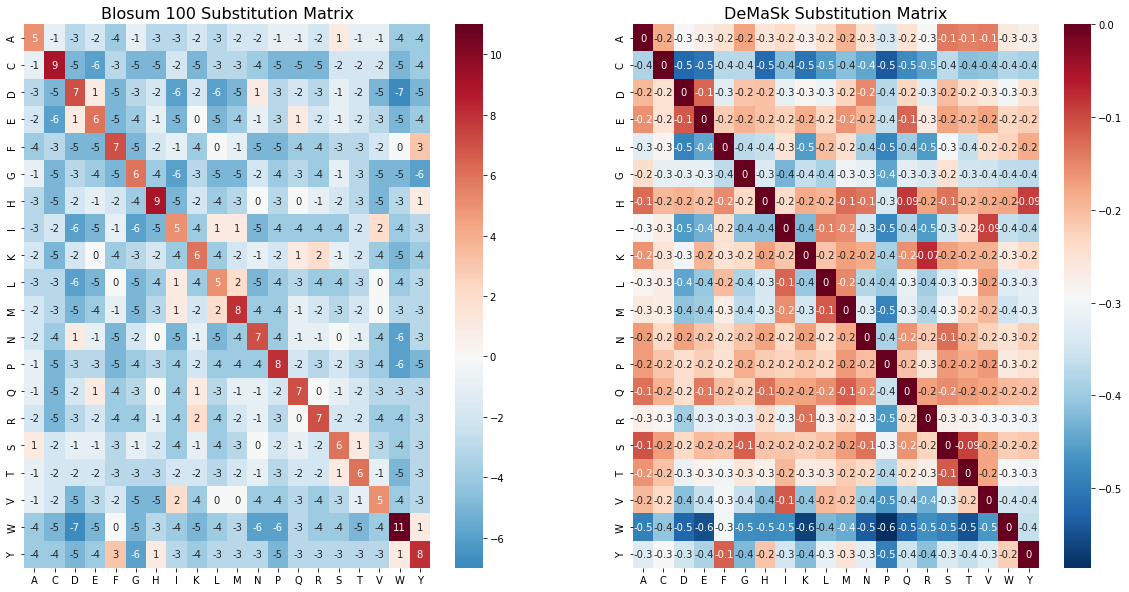

In [15]:
# BLOSUM SUBSTITUTION MATRICES
from Bio.SubsMat import MatrixInfo
def get_sub_matrix(matrix_name="blosum100"):
    sub_matrix = getattr(MatrixInfo, matrix_name)
    sub_matrix.update({(k[1], k[0]):v for k,v in sub_matrix.items() if (k[1], k[0]) not in list(sub_matrix.keys())})
    return sub_matrix
sub_mat_b100 = get_sub_matrix("blosum100")
sub_mat_b80 = get_sub_matrix("blosum80")
sub_mat_b60 = get_sub_matrix("blosum60")
sub_mat_b40 = get_sub_matrix("blosum40")

# DEMASK SUBSTITUTION MATRICES
dff = pd.read_csv('../input/nesp-test-wildtype-pdb/matrix.txt', sep='\t')
letters = list( dff.columns )
l_dict = {x:y for x,y in zip(letters,range(20))}
sub_mat_demask = {}
for x in letters:
    for y in letters:
        sub_mat_demask[(x,y)] = dff.iloc[l_dict[x],l_dict[y]]

# PLOT MATRICES
AA = np.sort(list(aa_map.values()))
blosum100 = np.zeros((20,20))
demask = np.zeros((20,20))
for (k1,k2),v in sub_mat_b100.items():
    if (k1!='Z')&(k2!='Z')&(k1!='B')&(k2!='B')&(k1!='X')&(k2!='X'):
        blosum100[ aa_map_2[k1], aa_map_2[k2] ] = v
for (k1,k2),v in sub_mat_demask.items():
    if (k1!='Z')&(k2!='Z')&(k1!='B')&(k2!='B')&(k1!='X')&(k2!='X'):
        demask[ aa_map_2[k1], aa_map_2[k2] ] = v
        
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(blosum100, cmap='RdBu_r', annot=True, center=0.0)
plt.xticks(np.arange(20)+0.5,AA)
plt.yticks(np.arange(20)+0.5,AA)
plt.title('Blosum 100 Substitution Matrix',size=16)
plt.subplot(1,2,2)
sns.heatmap(demask, cmap='RdBu_r', annot=True, fmt='.1g') #, center=0.0)
plt.xticks(np.arange(20)+0.5,AA)
plt.yticks(np.arange(20)+0.5,AA)
plt.title('DeMaSk Substitution Matrix',size=16)
plt.show()

## Transformer ESM Features
In order to convert amino acid sequences aka proteins into meaningful features, we will use embeddings from SOTA protein transformer. We use Facebook's pretrained protein transformer ESM (Evolutionary Scale Modeling) with research paper [here][1] and GitHub [here][2]. Kaggleqrdl provided a starter notebook [here][3]. In version 15+, we also extract mutation probabilties and mutation entropy from ESM!

[1]: https://www.biorxiv.org/content/10.1101/622803v4
[2]: https://github.com/facebookresearch/esm
[3]: https://www.kaggle.com/code/kaggleqrdl/esm-quick-start-lb237

In [16]:
# https://github.com/facebookresearch/esm
!pip install fair-esm -q

# https://www.kaggle.com/code/kaggleqrdl/esm-quick-start-lb237
import torch, esm
token_map = {'L': 0, 'A': 1, 'G': 2, 'V': 3, 'S': 4, 'E': 5, 'R': 6, 'T': 7, 'I': 8, 'D': 9, 'P': 10, 
         'K': 11, 'Q': 12, 'N': 13, 'F': 14, 'Y': 15, 'M': 16, 'H': 17, 'W': 18, 'C': 19}
t_model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
t_model.eval()  # disables dropout for deterministic results
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
t_model.to(device)

Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
    (1): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bia

### Embeddings
We input each train and test wildtype into our transformer and extract the last hidden layers activations. For each protein, this has shape `(1, len_protein_seq, 1280)`. We will save the full embeddings and the pooled embeddings for use later. Additionally we will save the MLM pretrain task amino acid prediction which indicates mutation probability and mutation entropy. This has shape `(1, len_protein_seq, 33)` but we extract to `(len_protein_seq, 20)` where 20 is number of common amino acids.

In [17]:
# TRAIN AND TEST WILDTYPES
PCA_CT = 16 # random sample size per protein to fit PCA with
all_pdb = [f for f in df.PDB.unique() if f not in bad]
base = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'
all_pdb_embed_pool = np.zeros((len(all_pdb)+1,1280))
all_pdb_embed_local = []
all_pdb_embed_tmp = []

from scipy.special import softmax 
from scipy.stats import entropy
all_pdb_prob = []

# EXTRACT TRANSFORMER EMBEDDINGS FOR TRAIN AND TEST WILDTYPES
print('Extracting embeddings from proteins...')
for i,p in enumerate(all_pdb+['TEST']):
    
    # WILDTYPE SEQUENCE
    print(p,', ',end='')
    if p=='TEST': seq = base
    else: seq = df.loc[df.PDB==p,'sequence'].iloc[0]
        
    # EXTRACT EMBEDDINGS, MUTATION PROBABILITIES, ENTROPY
    data = [("protein1", seq)]
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    batch_tokens = batch_tokens.to(device)
    with torch.no_grad():
        results = t_model(batch_tokens, repr_layers=[33])
    logits = (results['logits'].detach().cpu().numpy()[0,].T)[4:24,1:-1]
    all_pdb_prob.append(softmax(logits,axis=0))
    results = results["representations"][33].detach().cpu().numpy()
    
    # SAVE EMBEDDINGS
    all_pdb_embed_local.append(results)
    all_pdb_embed_pool[i,] = np.mean( results[0,:,:],axis=0 )
    
    # TEMPORARILY SAVE LOCAL MUTATION EMBEDDINGS
    tmp = df.loc[df.PDB==p,'position'].unique()
    if p=='TEST': tmp = np.random.choice(range(20,200),PCA_CT,replace=False)
    if len(tmp)>PCA_CT: tmp = np.random.choice(tmp,PCA_CT,replace=False)
    for j in tmp: all_pdb_embed_tmp.append( results[0,j,:] )
        
    del batch_tokens, results
    gc.collect(); torch.cuda.empty_cache()

all_pdb_embed_tmp = np.stack(all_pdb_embed_tmp)

Extracting embeddings from proteins...
1A43 , 1A5E , 1A7C , 1AAR , 1AG2 , 1AJ3 , 1AKK , 1AM7 , 1ANK , 1APS , 1ARR , 1AXB , 1AYF , 1AYI , 1AZP , 1B0O , 1B10 , 1BFG , 1BFM , 1BNI , 1BP2 , 1BPI , 1BTA , 1BU4 , 1BVC , 1BYW , 1C2R , 1C9O , 1CDC , 1CF3 , 1CHK , 1CQW , 1CSP , 1CYC , 1DIL , 1DIV , 1DKT , 1FKJ , 1FRD , 1FTG , 1FXA , 1G6N , 1G6P , 1H0C , 1H0X , 1H56 , 1H7M , 1HFY , 1HFZ , 1HME , 1HNG , 1HTI , 1HUE , 1IGV , 1IHB , 1IMQ , 1IO2 , 1IOB , 1IRO , 1ITM , 1JY0 , 1K5U , 1K9Q , 1KCQ , 1KFW , 1LS4 , 1LZ1 , 1M21 , 1M7T , 1MBG , 1MGR , 1MJ5 , 1MJC , 1MSI , 1N18 , 1N88 , 1NVO , 1O1U , 1OH0 , 1OIA , 1ONC , 1P2P , 1PDO , 1PFL , 1POH , 1PX0 , 1QGD , 1QLP , 1QM0 , 1QND , 1QQV , 1REI , 1RGG , 1RIL , 1RIS , 1ROP , 1RRO , 1RTB , 1RX4 , 1SHF , 1SHG , 1STN , 1SUP , 1TEN , 1TIT , 1TTG , 1TUP , 1TUX , 1UBQ , 1UWO , 1UZC , 1VII , 1VQB , 1W4E , 1W4H , 1WIT , 1XZO , 1Y4Y , 1Y9X , 1YYJ , 2A01 , 2A36 , 2ABD , 2AFG , 2AKY , 2BJD , 2C9Q , 2DRI , 2DVV , 2GNQ , 2HBB , 2HMB , 2HPR , 2IFB , 2IN9 , 2K3K , 2K7K , 2K

### RAPIDS PCA
The transformer embeddings have dimension 1280. Since we only have a few thousand rows of train data, that is too many features to include all of them in our XGB model. Furthermore, we want to use local, pooling, and delta embeddings. Which would be 3x1280. To prevent our model from overfitting as a result of the "curse of dimensionality", we reduce the dimension of embeddings using RAPIDS PCA. 

In [18]:
# REDUCE EMBEDDING DIM FROM 1280 TO 32 OR 16 WITH PCA
from cuml import PCA
pca_pool = PCA(n_components=32)
pca_embeds = pca_pool.fit_transform(all_pdb_embed_pool.astype('float32'))
pca_local = PCA(n_components=16)
pca_local.fit(all_pdb_embed_tmp.astype('float32'))
pdb_map = {x:y for x,y in zip(all_pdb,range(len(all_pdb)))}
pdb_map['kaggle'] = len(all_pdb)
del all_pdb_embed_tmp
_ = gc.collect()

## Feature Engineering Function

In [19]:
# FEATURE ENGINEER FUNCTION
def get_new_row(atom_df, j, row):
    ##################
    # ATOM_DF - IS PDB FILE'S ATOM_DF
    # J - IS RESIDUE NUMBER WHICH IS TRAIN CSV POSITION PLUS OFFSET
    # ROW - IS ROW FROM DOWNLOADED TRAIN CSV
    ##################
        
    dd = None
    tmp = atom_df.loc[(atom_df.residue_number==j)].reset_index(drop=True)
    prev = atom_df.loc[(atom_df.residue_number==j-1)].reset_index(drop=True)
    post = atom_df.loc[(atom_df.residue_number==j+1)].reset_index(drop=True)
    
    # FEATURE ENGINEER
    if len(tmp)>0:
        
        # GET MUTANT EMBEDDINGS
        data = [("protein1", row.mutant_seq)]
        batch_labels, batch_strs, batch_tokens = batch_converter(data)
        batch_tokens = batch_tokens.to(device)
        with torch.no_grad():
            results = t_model(batch_tokens, repr_layers=[33]) 
        results = results["representations"][33].cpu().numpy()
        mutant_local = pca_local.transform(results[:1,row.position,:])[0,]
        mutant_pool = np.mean( results[:1,:,:],axis=1 )
        mutant_pool = pca_pool.transform(mutant_pool)[0,]
    
        # MUTATION AND POSITION
        dd = {}
        dd['WT'] = row.wildtype
        dd['WT2'] = tmp.residue_name.map(aa_map)[0]
        dd['MUT'] = row.mutation
        dd['position'] = row.position
        dd['relative_position'] = row.position / len(row.sequence)

        # B_FACTOR
        if USE_B_COLUMN: dd['b_factor'] = tmp.b_factor.mean()
        
        # ANIMO ACID PROPERTIES AND DELTAS
        for c in PROPS:
            dd[f'{c}_1'] = aa_props.loc[row.wildtype,c]
            dd[f'{c}_2'] = aa_props.loc[row.mutation,c]
            dd[f'{c}_delta'] = dd[f'{c}_2']-dd[f'{c}_1']
            
        # SUBSTITUTION MATRICES
        dd['blosum100'] = sub_mat_b100[(row.wildtype,row.mutation)]
        dd['blosum80'] = sub_mat_b80[(row.wildtype,row.mutation)]
        dd['blosum60'] = sub_mat_b60[(row.wildtype,row.mutation)]
        dd['blosum40'] = sub_mat_b40[(row.wildtype,row.mutation)]
        dd['demask'] = sub_mat_demask[(row.wildtype,row.mutation)]

        # PREVIOUS AND POST AMINO ACID INFO
        if (len(prev)>0):
            dd['prev'] = prev.residue_name.map(aa_map)[0]
            if USE_B_COLUMN: dd['b_factor_prev'] = prev.b_factor.mean()
        else:
            dd['prev'] = 'X'
            if USE_B_COLUMN: dd['b_factor_prev'] = -999            
            
        if (len(post)>0):
            dd['post'] = post.residue_name.map(aa_map)[0]
            if USE_B_COLUMN: dd['b_factor_post'] = post.b_factor.mean() 
        else:
            dd['post'] = 'X'
            if USE_B_COLUMN: dd['b_factor_post'] = -999 
            
        # ANGLE BETWEEN MUTATION AND NEIGHBORS
        if (len(prev)>0)&(len(post)>0):
            # BACKBONE ATOMS
            atm = ['N','H','CA','O']
            prev = prev.loc[prev.atom_name.isin(atm)]
            tmp = tmp.loc[tmp.atom_name.isin(atm)]
            post = post.loc[post.atom_name.isin(atm)]
            # VECTORS
            c_prev = np.array( [prev.x_coord.mean(),prev.y_coord.mean(),prev.z_coord.mean()] )
            c_tmp = np.array( [tmp.x_coord.mean(),tmp.y_coord.mean(),tmp.z_coord.mean()] )
            c_post = np.array( [post.x_coord.mean(),post.y_coord.mean(),post.z_coord.mean()] )
            vec_a = c_prev - c_tmp
            vec_b = c_post - c_tmp
            # COMPUTE ANGLE
            norm_a = np.sqrt(vec_a.dot(vec_a))
            norm_b = np.sqrt(vec_b.dot(vec_b))
            dd['cos_angle'] = vec_a.dot(vec_b)/norm_a/norm_b
        else:
            dd['cos_angle'] = -2
            
        # 3D LOCATION OF MUTATION
        atm = ['N','H','CA','O']
        atoms = atom_df.loc[atom_df.atom_name.isin(atm)]
        centroid1 = np.array( [atoms.x_coord.mean(),atoms.y_coord.mean(),atoms.z_coord.mean()] )
        tmp = tmp.loc[tmp.atom_name.isin(atm)]
        centroid2 = np.array( [tmp.x_coord.mean(),tmp.y_coord.mean(),tmp.z_coord.mean()] )
        dist = centroid2 - centroid1
        dd['location3d'] = dist.dot(dist)
        
        # TRANSFORMER ESM EMBEDDINGS
        wt_local = pca_local.transform(all_pdb_embed_local[pdb_map[row.PDB]][:1,row.position,:])[0,]
        wt_pool = pca_embeds[pdb_map[row.PDB],]
        for kk in range(32):
            dd[f'pca_pool_{kk}'] = mutant_pool[kk] - wt_pool[kk]
            if kk>=16: continue
            dd[f'pca_wt_{kk}'] = wt_local[kk]
            dd[f'pca_mutant_{kk}'] = mutant_local[kk]
            dd[f'pca_local_{kk}'] = mutant_local[kk] - wt_local[kk]
            
        # TRANSFORMER MUTATION PROBS AND ENTROPY
        dd['mut_prob'] = all_pdb_prob[pdb_map[row.PDB]][token_map[dd['MUT']],dd['position']-1]
        dd['mut_entropy'] = entropy( all_pdb_prob[pdb_map[row.PDB]][:,dd['position']-1] )
        
        # SURFACE AREA FEATURES
        PATH = '../input/nesp-kaggle-train-surface-area/'
        if row.CIF: 
            nm = f'{row.CIF}-model_v3.csv'
        elif row.PDB!='kaggle': 
            PATH = '../input/nesp-jin-external-surface-area/'
            nm = f'{row.PDB}.csv'
        else: 
            nm = 'wildtype_structure_prediction_af2_SASA.csv'
        try:    
            area = pd.read_csv(f'{PATH}{nm}')
            rw = area.loc[area.Residue_number==j].iloc[0]
            dd['sa_total'] = rw.Total
            dd['sa_apolar'] = rw.Apolar
            dd['sa_backbone'] = rw.Backbone
            dd['sa_sidechain'] = rw.Sidechain
            dd['sa_ratio'] = rw.Ratio
            dd['sa_in/out'] = -1
            if rw['In/Out']=='i': dd['sa_in/out'] = 1
            elif rw['In/Out']=='o': dd['sa_in/out'] = 0
        except:
            print('### NEED SURFACE AREA for PDB:',row.PDB,'residue_number:',j)
            return None
        
        # LABEL ENCODE AMINO ACIDS
        dd['AA1'] = aa_map_2[dd['WT']]
        dd['AA2'] = aa_map_2[dd['MUT']]
        dd['AA3'] = aa_map_2[dd['prev']]
        dd['AA4'] = aa_map_2[dd['post']]
        
        # TARGETS AND SOURCES
        dd['ddG'] = row.ddG
        dd['dTm'] = row.dTm
        dd['pdb'] = row.PDB
        dd['source'] = row.source
        
        del batch_tokens, results, mutant_local, mutant_pool, wt_local, wt_pool
        gc.collect(); torch.cuda.empty_cache()

    return dd

# Transform Train Data

In [20]:
pdb = None
rows = []
offsets = []

for index,row in df.iterrows():
    if row.PDB in bad: continue
        
    # READ PDB FILE WHICH CONTAINS MORE INFO ABOUT PROTEIN
    first = False
    if row.PDB != pdb:
        pdb = row.PDB
        if row.CIF:
            atom_df = PandasMmcif().read_mmcif(f'../input/train-wildtypes-af/cif/{row.CIF}-model_v3.cif')
            atom_df = atom_df.df['ATOM']
            atom_df = atom_df.rename({'label_seq_id':'residue_number','label_comp_id':'residue_name'},axis=1)
            atom_df = atom_df.rename({'Cartn_x':'x_coord','Cartn_y':'y_coord','Cartn_z':'z_coord'},axis=1)
            atom_df = atom_df.rename({'B_iso_or_equiv':'b_factor','label_atom_id':'atom_name'},axis=1)
        else:
            atom_df = PandasPdb().read_pdb(f'downloaded_pdb/{row.PDB}.pdb')
            atom_df = atom_df.df['ATOM']
        first = True

    # VERY IMPORTANT - ALIGN SEQUENCES
    # THE RESIDUE NUMBERS IN PDB FILES DONT MATCH THE POSTION NUMBERS IN CSV FILE!
    tmp = atom_df.drop_duplicates(['residue_name','residue_number']).sort_values('residue_number')
    tmp = tmp.iloc[20:36].reset_index(drop=True)
    d = (tmp.residue_number.diff()!=1.0).sum()
    if d>1: print(f'=> ERROR missing consecutive amino acids in PDB file {row.PDB}')
    tmp['letter'] = tmp.residue_name.map(aa_map)  
    pdb_seq = (''.join( tmp.letter.values ))
    csv_seq = df.loc[df.PDB==row.PDB,'sequence'].values[0]
    i = csv_seq.find(pdb_seq)
    if i==-1: print('=> ERROR cannot find PDB sequence in CSV sequence for {row.PDB}')
    x = tmp.loc[0,'residue_number']
    offset = (x-i)-1
    if first: 
        print(f'{row.PDB} PDB residue_number equals {offset} added to position in CSV')
        dd = {}
        dd['pdb'] = row.PDB
        dd['offset'] = offset
        offsets.append(dd)
    
    # FEATURE ENGINEER
    j = row.position + offset
    dd = get_new_row(atom_df, j, row)
    if dd is not None:
        rows.append(dd)

1A43 PDB residue_number equals 147 added to position in CSV
1A5E PDB residue_number equals 0 added to position in CSV
1A7C PDB residue_number equals 1 added to position in CSV
1AAR PDB residue_number equals 0 added to position in CSV
1AG2 PDB residue_number equals 123 added to position in CSV
1AJ3 PDB residue_number equals 9 added to position in CSV
1AKK PDB residue_number equals 0 added to position in CSV
1AM7 PDB residue_number equals 1 added to position in CSV
1ANK PDB residue_number equals 0 added to position in CSV
1APS PDB residue_number equals 0 added to position in CSV
1ARR PDB residue_number equals 0 added to position in CSV
1AXB PDB residue_number equals 2 added to position in CSV
1AYF PDB residue_number equals 5 added to position in CSV
1AYI PDB residue_number equals 0 added to position in CSV
1AZP PDB residue_number equals 0 added to position in CSV
1B0O PDB residue_number equals 1 added to position in CSV
1B10 PDB residue_number equals 124 added to position in CSV
1BFG PDB

In [21]:
# ADD THESE OFFSETS TO CSV'S POSITION TO GET PDB'S RESIDUE NUMBER
offsets = pd.DataFrame(offsets)
offsets = offsets.loc[offsets.pdb.str[:2]!='GP'] # drop kaggle CIF
if len(offsets)>0:
    offsets.to_csv('downloaded_csv/PDB_offset_from_CSV.csv',index=False)
    print('Add these offsets to CSV position to get PDB residue number')
    display( offsets.head() )

Add these offsets to CSV position to get PDB residue number


,pdb,offset
0,1A43,147
1,1A5E,0
2,1A7C,1
3,1AAR,0
4,1AG2,123


# Create Train and Holdout
We create train and holdout datasets based on variables in code cell #1. We will rank normalize the targets so that the model so the model can train with data from different sources and all targets will look similar to the model.

In [22]:
# CREATE EXTERNAL TRAIN DATAFRAME
train = pd.DataFrame(rows)
train = train.loc[train.WT == train.WT2].reset_index(drop=True)
print('Train plus Holdout data shape', train.shape )
train['ct'] = train.groupby('pdb').WT.transform('count')
train = train.loc[train.ct>EXCLUDE_CT_UNDER].reset_index(drop=True)
train = train.drop(['WT2','ct'],axis=1)
print('Data shape after removing small mutation groups', train.shape )

Train plus Holdout data shape (6463, 146)
Data shape after removing small mutation groups (4944, 145)


In [23]:
# RANK NORMALIZE ddG AND dTm TARGETS SO ALL CAN BE MIXED TOGETHER
train['target'] = 0.5
for g in train.pdb.unique():
    target = 'dTm'
    tmp = train.loc[train.pdb==g,'dTm']
    if tmp.isna().sum()>len(tmp)/2: target = 'ddG'
    train.loc[train.pdb==g,'target'] =\
        rankdata(train.loc[train.pdb==g,target])/len(train.loc[train.pdb==g,target])
train.head()

,WT,MUT,position,relative_position,Molecular Weight_1,Molecular Weight_2,Molecular Weight_delta,Residue Weight_1,Residue Weight_2,Residue Weight_delta,pKa1_1,pKa1_2,pKa1_delta,pKb2_1,pKb2_2,pKb2_delta,pKx3_1,pKx3_2,pKx3_delta,pl4_1,pl4_2,pl4_delta,H_1,H_2,H_delta,VSC_1,VSC_2,VSC_delta,P1_1,P1_2,P1_delta,P2_1,P2_2,P2_delta,SASA_1,SASA_2,SASA_delta,NCISC_1,NCISC_2,NCISC_delta,blosum100,blosum80,blosum60,blosum40,demask,prev,post,cos_angle,location3d,pca_pool_0,pca_wt_0,pca_mutant_0,pca_local_0,pca_pool_1,pca_wt_1,pca_mutant_1,pca_local_1,pca_pool_2,pca_wt_2,pca_mutant_2,pca_local_2,pca_pool_3,pca_wt_3,pca_mutant_3,pca_local_3,pca_pool_4,pca_wt_4,pca_mutant_4,pca_local_4,pca_pool_5,pca_wt_5,pca_mutant_5,pca_local_5,pca_pool_6,pca_wt_6,pca_mutant_6,pca_local_6,pca_pool_7,pca_wt_7,pca_mutant_7,pca_local_7,pca_pool_8,pca_wt_8,pca_mutant_8,pca_local_8,pca_pool_9,pca_wt_9,pca_mutant_9,pca_local_9,pca_pool_10,pca_wt_10,pca_mutant_10,pca_local_10,pca_pool_11,pca_wt_11,pca_mutant_11,pca_local_11,pca_pool_12,pca_wt_12,pca_mutant_12,pca_local_12,pca_pool_13,pca_wt_13,pca_mutant_13,pca_local_13,pca_pool_14,pca_wt_14,pca_mutant_14,pca_local_14,pca_pool_15,pca_wt_15,pca_mutant_15,pca_local_15,pca_pool_16,pca_pool_17,pca_pool_18,pca_pool_19,pca_pool_20,pca_pool_21,pca_pool_22,pca_pool_23,pca_pool_24,pca_pool_25,pca_pool_26,pca_pool_27,pca_pool_28,pca_pool_29,pca_pool_30,pca_pool_31,mut_prob,mut_entropy,sa_total,sa_apolar,sa_backbone,sa_sidechain,sa_ratio,sa_in/out,AA1,AA2,AA3,AA4,ddG,dTm,pdb,source,target
0,H,A,1,0.010204,155.16,89.10,-66.06,137.14,71.08,-66.06,1.82,2.34,0.52,9.17,9.69,0.52,6.00,NaN,NaN,7.59,6.00,-1.59,-0.40,0.62,1.02,79.0,27.5,-51.5,10.4,8.1,-2.3,0.230,0.046,-0.184,2.025,1.181,-0.844,-0.010690,0.007187,0.017877,-3,-2,-2,-2,-0.1271,X,Q,-2.000000,428.159734,0.059647,-1.706213,-1.789394,-0.083181,-0.031327,-0.209708,-0.225682,-0.015973,0.014655,0.555739,0.128634,-0.427105,-0.017990,0.743646,0.688693,-0.054953,-0.020013,0.544727,0.146291,-0.398436,-0.011445,-0.682050,-1.116271,-0.434221,0.000779,0.010724,-0.133091,-0.143815,-0.013614,-0.034981,0.180194,0.215175,0.005026,0.027225,-0.937509,-0.964734,0.013670,0.039963,-0.385551,-0.425514,-0.017173,-0.245294,-0.530437,-0.285143,-0.006627,0.066019,0.099789,0.033771,0.007752,-0.474388,0.198008,0.672396,0.000904,-0.134462,0.018520,0.152982,-0.003660,0.378783,0.623410,0.244627,0.000164,-0.275364,-0.646168,-0.370804,-0.003722,0.012260,-0.008403,-0.005266,-0.009020,0.003361,-0.029209,0.007647,0.007314,0.005711,0.004538,-0.007070,0.007715,0.015640,0.001010,0.011139,0.022294,1.767246,161.56,110.83,40.10,121.46,78.6,0,6,0,20,13,0.5,NaN,1AJ3,jin_train.csv,0.962121
1,H,G,1,0.010204,155.16,75.07,-80.09,137.14,57.05,-80.09,1.82,2.34,0.52,9.17,9.60,0.43,6.00,NaN,NaN,7.59,5.97,-1.62,-0.40,0.48,0.88,79.0,0.0,-79.0,10.4,9.0,-1.4,0.230,0.000,-0.230,2.025,0.881,-1.144,-0.010690,0.179052,0.189742,-4,-3,-2,-2,-0.2352,X,Q,-2.000000,428.159734,0.070258,-1.706213,-2.019783,-0.313570,-0.006980,-0.209708,0.094914,0.304623,0.010339,0.555739,0.439233,-0.116506,-0.011585,0.743646,0.407195,-0.336452,-0.021346,0.544727,0.426300,-0.118427,-0.013376,-0.682050,-0.695021,-0.012971,-0.001845,0.010724,-0.161574,-0.172298,-0.011426,-0.034981,0.879486,0.914467,0.004423,0.027225,0.655501,0.628275,0.003307,0.039963,-0.641647,-0.681610,-0.009987,-0.245294,0.136802,0.382096,0.003115,0.066019,-0.166033,-0.232051,0.009215,-0.474388,-0.487715,-0.013326,0.009099,-0.134462,-0.034739,0.099723,-0.002819,0.378783,0.156531,-0.222253,-0.002148,-0.275364,-0.107002,0.168361,-0.006900,0.008734,-0.020732,-0.000696,-0.003806,-0.015211,-0.024021,0.002735,-0.007755,0.004004,0.013486,0.003154,0.004140,0.005726,0.008756,0.011527,0.012239,1.767246,161.56,110.83,40.10,121.46,78.6,0,6,5,20,13,-0.5,NaN,1AJ3,jin_train.csv,0.590909
2,F,A,3,0.030612,165.19,89.10,-76.09,147.18,71.08,-76.10,1.83,2.34,0.51,9.13,9.69,0.56,NaN,NaN,NaN,5.48,6.00,0.52,1.19,0.62,-0.57,115.5,27.5,-88.0,5.2,8.1,2.9,0.290,0.046,-0.244,2.228,1.181,-1.047,0.037552,0.007187,-0.030

In [24]:
# USE some sources TO TRAIN/VALIDATE AND other sources TO HOLDOUT VALIDATE
holdout = train.loc[train.source.isin(HOLDOUT_SOURCES)].reset_index(drop=True)
train = train.loc[train.source.isin(KFOLD_SOURCES)].reset_index(drop=True)

# LABEL ENCODE GROUPS FOR GROUP K FOLD
train['group'],_ = train.pdb.factorize()
holdout['group'],_ = holdout.pdb.factorize()

In [25]:
EXCLUDE = ['WT','MUT','prev','post','ddG','dTm','pdb','source','target','group','oof']
FEATURES = [c for c in train.columns if c not in EXCLUDE]
print(f'We have {len(FEATURES)} features for our model:')
print( FEATURES )

We have 137 features for our model:
['position', 'relative_position', 'Molecular Weight_1', 'Molecular Weight_2', 'Molecular Weight_delta', 'Residue Weight_1', 'Residue Weight_2', 'Residue Weight_delta', 'pKa1_1', 'pKa1_2', 'pKa1_delta', 'pKb2_1', 'pKb2_2', 'pKb2_delta', 'pKx3_1', 'pKx3_2', 'pKx3_delta', 'pl4_1', 'pl4_2', 'pl4_delta', 'H_1', 'H_2', 'H_delta', 'VSC_1', 'VSC_2', 'VSC_delta', 'P1_1', 'P1_2', 'P1_delta', 'P2_1', 'P2_2', 'P2_delta', 'SASA_1', 'SASA_2', 'SASA_delta', 'NCISC_1', 'NCISC_2', 'NCISC_delta', 'blosum100', 'blosum80', 'blosum60', 'blosum40', 'demask', 'cos_angle', 'location3d', 'pca_pool_0', 'pca_wt_0', 'pca_mutant_0', 'pca_local_0', 'pca_pool_1', 'pca_wt_1', 'pca_mutant_1', 'pca_local_1', 'pca_pool_2', 'pca_wt_2', 'pca_mutant_2', 'pca_local_2', 'pca_pool_3', 'pca_wt_3', 'pca_mutant_3', 'pca_local_3', 'pca_pool_4', 'pca_wt_4', 'pca_mutant_4', 'pca_local_4', 'pca_pool_5', 'pca_wt_5', 'pca_mutant_5', 'pca_local_5', 'pca_pool_6', 'pca_wt_6', 'pca_mutant_6', 'pca_local

# XGBoost Model

In [26]:
# LOAD XGB LIBRARY
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
print('XGB Version',xgb.__version__)

FOLDS = 11
SEED = 123

# XGB MODEL PARAMETERS
xgb_parms = { 
    'max_depth':4, 
    'learning_rate':0.001, 
    'subsample':0.6,
    'colsample_bytree':0.2, 
    'eval_metric':'rmse',
    'objective':'reg:squarederror',
    'tree_method':'gpu_hist',
    'predictor':'gpu_predictor',
    'random_state':SEED
}

XGB Version 1.6.2


In [27]:
%%time
importances = []
importances2 = []
oof = np.zeros(len(train))
preds = np.zeros(len(holdout))
os.system('mkdir xgb_models')

skf = GroupKFold(n_splits=FOLDS)
for fold,(train_idx, valid_idx) in enumerate(skf.split(
            train, train.target, train.group )):
        
    print('#'*25)
    print('### Fold',fold+1)
    print('### Train size',len(train_idx),'Valid size',len(valid_idx))
    print('#'*25)
    
    # TRAIN, VALID, HOLDOUT FOR FOLD K
    X_train = train.loc[train_idx, FEATURES]
    y_train = train.loc[train_idx,'target']
    X_valid = train.loc[valid_idx, FEATURES]
    y_valid = train.loc[valid_idx, 'target']
    X_holdout = holdout[FEATURES]
    
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
    dvalid = xgb.DMatrix(data=X_valid, label=y_valid)
    dholdout = xgb.DMatrix(data=X_holdout)
    
    # TRAIN MODEL FOLD K
    model = xgb.train(xgb_parms, 
                dtrain=dtrain,
                evals=[(dtrain,'train'),(dvalid,'valid')],
                num_boost_round=9999,
                early_stopping_rounds=100,
                verbose_eval=100) 
    model.save_model(f'xgb_models/XGB_fold{fold}.xgb')
    
    # GET FEATURE IMPORTANCE FOR FOLD K
    dd = model.get_score(importance_type='weight')
    df = pd.DataFrame({'feature':dd.keys(),f'importance_{fold}':dd.values()})
    importances.append(df)
    dd = model.get_score(importance_type='gain')
    df = pd.DataFrame({'feature':dd.keys(),f'importance_{fold}':dd.values()})
    importances2.append(df)
            
    # INFER OOF FOLD K
    oof_preds = model.predict(dvalid)
    rsme = mean_squared_error(y_valid.values, oof_preds, squared=False)
    print('RSME =',rsme,'\n')
    oof[valid_idx] = oof_preds
    
    # HOLDOUT PREDS
    if len(holdout)>0:
        p = model.predict(dholdout)
        preds += p/FOLDS
    
    del dtrain, X_train, y_train, dd, df
    del X_valid, y_valid, dvalid, model
    _ = gc.collect()
    
print('#'*25)
rsme = mean_squared_error(train.target.values, oof, squared=False)
print('OVERALL RSME =',rsme,'\n')

train['oof'] = oof
if len(holdout)>0: holdout['preds'] = preds

#########################
### Fold 1
### Train size 3241 Valid size 526
#########################
[0]	train-rmse:0.28831	valid-rmse:0.28852
[100]	train-rmse:0.28263	valid-rmse:0.28221
[200]	train-rmse:0.27742	valid-rmse:0.27645
[300]	train-rmse:0.27273	valid-rmse:0.27138
[400]	train-rmse:0.26838	valid-rmse:0.26659
[500]	train-rmse:0.26435	valid-rmse:0.26220
[600]	train-rmse:0.26068	valid-rmse:0.25828
[700]	train-rmse:0.25726	valid-rmse:0.25477
[800]	train-rmse:0.25413	valid-rmse:0.25161
[900]	train-rmse:0.25118	valid-rmse:0.24860
[1000]	train-rmse:0.24845	valid-rmse:0.24578
[1100]	train-rmse:0.24591	valid-rmse:0.24328
[1200]	train-rmse:0.24353	valid-rmse:0.24113
[1300]	train-rmse:0.24127	valid-rmse:0.23900
[1400]	train-rmse:0.23917	valid-rmse:0.23719
[1500]	train-rmse:0.23720	valid-rmse:0.23552
[1600]	train-rmse:0.23527	valid-rmse:0.23383
[1700]	train-rmse:0.23345	valid-rmse:0.23230
[1800]	train-rmse:0.23171	valid-rmse:0.23094
[1900]	train-rmse:0.23008	valid-rmse:0.22964
[2000]	train-r

# Feature Importance
Below we display both XGB feature importance by `weight` and by `gain`.

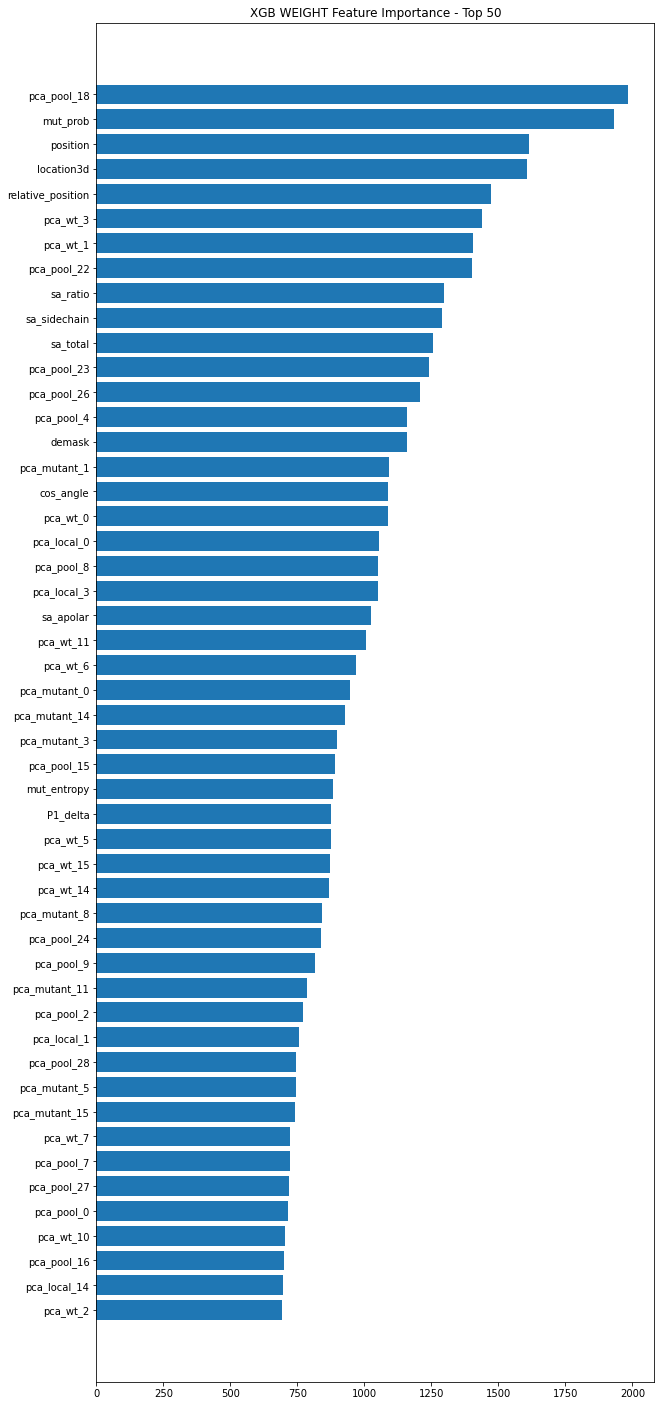

In [28]:
df = importances[0].copy()
for k in range(1,FOLDS): df = df.merge(importances[k], on='feature', how='left')
df['importance'] = df.iloc[:,1:].mean(axis=1)
df = df.sort_values('importance',ascending=False)
NUM_FEATURES = 50 #len(df)
plt.figure(figsize=(10,5*NUM_FEATURES//10))
plt.barh(np.arange(NUM_FEATURES,0,-1), df.importance.values[:NUM_FEATURES])
plt.yticks(np.arange(NUM_FEATURES,0,-1), df.feature.values[:NUM_FEATURES])
plt.title(f'XGB WEIGHT Feature Importance - Top {NUM_FEATURES}')
plt.show()

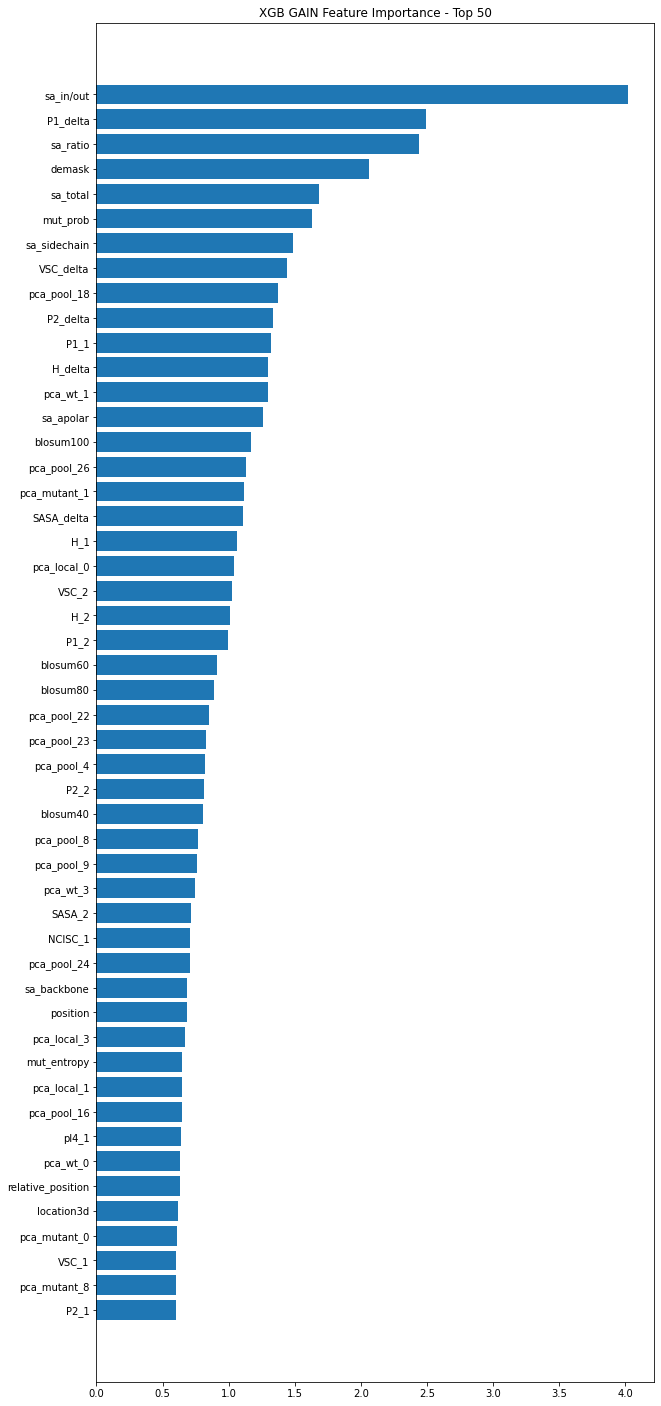

In [29]:
df = importances2[0].copy()
for k in range(1,FOLDS): df = df.merge(importances2[k], on='feature', how='left')
df['importance'] = df.iloc[:,1:].mean(axis=1)
df = df.sort_values('importance',ascending=False)
NUM_FEATURES = 50 #len(df)
plt.figure(figsize=(10,5*NUM_FEATURES//10))
plt.barh(np.arange(NUM_FEATURES,0,-1), df.importance.values[:NUM_FEATURES])
plt.yticks(np.arange(NUM_FEATURES,0,-1), df.feature.values[:NUM_FEATURES])
plt.title(f'XGB GAIN Feature Importance - Top {NUM_FEATURES}')
plt.show()

# Validate OOF (on either dTm or ddG)

In [30]:
sp = []; sp_dtm = []; sp_ddg = []
for p in train.pdb.unique():

    tmp = train.loc[train.pdb==p].reset_index(drop=True)
    ttarget = 'dTm'
    if tmp['dTm'].isna().sum()>len(tmp)/2: ttarget = 'ddG'
    print('Protein',p,'has mutation count =',len(tmp),'and target =',ttarget)
    r = np.abs( spearmanr(tmp.oof.values, tmp[ttarget].values).correlation )
    print('Spearman Metric =',r)
    sp.append(r)
    if ttarget=='dTm': sp_dtm.append(r)
    else: sp_ddg.append(r)
    print()

print('#'*25)
if len(sp_dtm)>0:
    print(f'Overall Spearman Metric (predicting dTm) =',np.nanmean(sp_dtm))
if len(sp_ddg)>0:
    print(f'Overall Spearman Metric (predicting ddG) =',np.nanmean(sp_ddg))

Protein 1AJ3 has mutation count = 66 and target = ddG
Spearman Metric = 0.7335599653520077

Protein 1APS has mutation count = 27 and target = ddG
Spearman Metric = 0.46144454375803845

Protein 1ARR has mutation count = 59 and target = ddG
Spearman Metric = 0.7309486721847334

Protein 1BNI has mutation count = 171 and target = ddG
Spearman Metric = 0.6864750865028888

Protein 1BPI has mutation count = 66 and target = ddG
Spearman Metric = 0.8113815054584025

Protein 1BU4 has mutation count = 71 and target = ddG
Spearman Metric = 0.7302484331253167

Protein 1BVC has mutation count = 73 and target = ddG
Spearman Metric = 0.7327511781313736

Protein 1CSP has mutation count = 50 and target = ddG
Spearman Metric = 0.6174457971959109

Protein 1FKJ has mutation count = 53 and target = ddG
Spearman Metric = 0.7959196056805525

Protein 1FTG has mutation count = 45 and target = ddG
Spearman Metric = 0.5284759052901536

Protein 1H7M has mutation count = 28 and target = ddG
Spearman Metric = 0.4113

# Validate Holdout (on either dTm or ddG)

In [31]:
sp = []; sp_dtm = []; sp_ddg = []
for p in holdout.pdb.unique():

    tmp = holdout.loc[holdout.pdb==p].reset_index(drop=True)
    ttarget = 'dTm'
    if tmp['dTm'].isna().sum()>len(tmp)/2: ttarget = 'ddG'
    print('Protein',p,'has mutation count =',len(tmp),'and target =',ttarget)
    r = np.abs( spearmanr(tmp.preds.values, tmp[ttarget].values).correlation )
    print('Spearman Metric =',r)
    sp.append(r)
    if ttarget=='dTm': sp_dtm.append(r)
    else: sp_ddg.append(r)
    print()

print('#'*25)
if len(sp_dtm)>0:
    print(f'Overall Spearman Metric (predicting dTm) =',np.nanmean(sp_dtm))
if len(sp_ddg)>0:
    print(f'Overall Spearman Metric (predicting ddG) =',np.nanmean(sp_ddg))

Protein GP01 has mutation count = 185 and target = dTm
Spearman Metric = 0.6766097467055034

Protein GP02 has mutation count = 211 and target = dTm
Spearman Metric = 0.710055769212217

Protein GP06 has mutation count = 56 and target = dTm
Spearman Metric = 0.16678797664338366

Protein GP07 has mutation count = 77 and target = dTm
Spearman Metric = 0.6078299643621575

Protein GP08 has mutation count = 55 and target = dTm
Spearman Metric = 0.29172068193218403

Protein GP09 has mutation count = 30 and target = dTm
Spearman Metric = 0.8728163388271348

Protein GP10 has mutation count = 84 and target = dTm
Spearman Metric = 0.5665299882920339

Protein GP11 has mutation count = 46 and target = dTm
Spearman Metric = 0.2355609507254659

Protein GP12 has mutation count = 78 and target = dTm
Spearman Metric = 0.6364947122449153

Protein GP14 has mutation count = 45 and target = dTm
Spearman Metric = 0.5796824572827513

Protein GP16 has mutation count = 33 and target = dTm
Spearman Metric = 0.753

# Transform Test Data
The PDB file provided by Kaggle does not contain real `b_factor`. The column labeled `b_factor` is actually `pLDDT` predicted by Alpha Fold. We will load a `PDF` file below of Kaggle's test protein with estimated `b_factor` downloaded from internet and provided by @kaggleqrdl and @ropeonmars described [here][1]. If we train with Alpha Fold PDB then we will load Kaggle's test PDB created by Alpha Fold.

[1]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356182#1968210

In [32]:
# LOAD TEST WILDTYPE
base = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'
len(base)

221

In [33]:
# LOAD TEST DATA
test = pd.read_csv('../input/novozymes-enzyme-stability-prediction/test.csv')
deletions = test.loc[test.protein_sequence.str.len()==220,'seq_id'].values
print('Test shape', test.shape )
test.head()

Test shape (2413, 4)


,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [34]:
# LOAD TEST DATA PDB FILE 
# NOTE KAGGLE'S PDB IS GENERATED BY ALPHA FOLD AND CONTAINS PLDDT IN B_FACTOR COLUMN
# WHEN TRAINING WITH KAGGLE.CSV WE NEED ALPHA FOLD PDB
# WHEN TRAINING WITH JIN DATA WE NEED PROTEIN DATA BANK PDB (with real b_factor)
if USE_PLDDT_INFER:
    atom_df = PandasPdb().read_pdb('../input/novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb')
else:
    atom_df = PandasPdb().read_pdb('../input/nesp-test-wildtype-pdb/model.pdb')
atom_df = atom_df.df['ATOM']
atom_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,VAL,,A,1,,,34.064,-6.456,50.464,1.0,42.82,10.46,,,NaN,2
1,ATOM,2,,H,,VAL,,A,1,,,33.576,-6.009,51.228,1.0,42.82,10.46,,,NaN,3
2,ATOM,3,,H2,,VAL,,A,1,,,33.882,-7.449,50.477,1.0,42.82,10.46,,,NaN,4
3,ATOM,4,,H3,,VAL,,A,1,,,35.060,-6.323,50.566,1.0,42.82,10.46,,,NaN,5
4,ATOM,5,,CA,,VAL,,A,1,,,33.643,-5.877,49.162,1.0,42.82,10.46,,,NaN,6


In [35]:
def get_test_mutation(row):
    for i,(a,b) in enumerate(zip(row.protein_sequence,base)):
        if a!=b: break
    row['wildtype'] = base[i]
    row['mutation'] = row.protein_sequence[i]
    row['position'] = i+1
    return row

# TRANSFORM TEST DATAFRAME TO MATCH TRAIN DATAFRAME
test = test.apply(get_test_mutation,axis=1)
test['ddG'] = np.nan
test['dTm'] = np.nan
test['CIF'] = None
test['sequence'] = base
test = test.rename({'protein_sequence':'mutant_seq'},axis=1)
test['source'] = 'kaggle'
test['PDB'] = 'kaggle'

# FEATURE ENGINEER TEST DATA
rows = []
print(f'Extracting embeddings and feature engineering {len(test)} test rows...')
for index,row in test.iterrows():
    if index%10==0: print(index,', ',end='')
    j = row.position
    dd = get_new_row(atom_df, j, row)
    rows.append(dd)
test = pd.DataFrame(rows)
test.head()

Extracting embeddings and feature engineering 2413 test rows...
0 , 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100 , 110 , 120 , 130 , 140 , 150 , 160 , 170 , 180 , 190 , 200 , 210 , 220 , 230 , 240 , 250 , 260 , 270 , 280 , 290 , 300 , 310 , 320 , 330 , 340 , 350 , 360 , 370 , 380 , 390 , 400 , 410 , 420 , 430 , 440 , 450 , 460 , 470 , 480 , 490 , 500 , 510 , 520 , 530 , 540 , 550 , 560 , 570 , 580 , 590 , 600 , 610 , 620 , 630 , 640 , 650 , 660 , 670 , 680 , 690 , 700 , 710 , 720 , 730 , 740 , 750 , 760 , 770 , 780 , 790 , 800 , 810 , 820 , 830 , 840 , 850 , 860 , 870 , 880 , 890 , 900 , 910 , 920 , 930 , 940 , 950 , 960 , 970 , 980 , 990 , 1000 , 1010 , 1020 , 1030 , 1040 , 1050 , 1060 , 1070 , 1080 , 1090 , 1100 , 1110 , 1120 , 1130 , 1140 , 1150 , 1160 , 1170 , 1180 , 1190 , 1200 , 1210 , 1220 , 1230 , 1240 , 1250 , 1260 , 1270 , 1280 , 1290 , 1300 , 1310 , 1320 , 1330 , 1340 , 1350 , 1360 , 1370 , 1380 , 1390 , 1400 , 1410 , 1420 , 1430 , 1440 , 1450 , 1460 , 1470 , 1480 , 1490

,WT,WT2,MUT,position,relative_position,Molecular Weight_1,Molecular Weight_2,Molecular Weight_delta,Residue Weight_1,Residue Weight_2,Residue Weight_delta,pKa1_1,pKa1_2,pKa1_delta,pKb2_1,pKb2_2,pKb2_delta,pKx3_1,pKx3_2,pKx3_delta,pl4_1,pl4_2,pl4_delta,H_1,H_2,H_delta,VSC_1,VSC_2,VSC_delta,P1_1,P1_2,P1_delta,P2_1,P2_2,P2_delta,SASA_1,SASA_2,SASA_delta,NCISC_1,NCISC_2,NCISC_delta,blosum100,blosum80,blosum60,blosum40,demask,prev,post,cos_angle,location3d,pca_pool_0,pca_wt_0,pca_mutant_0,pca_local_0,pca_pool_1,pca_wt_1,pca_mutant_1,pca_local_1,pca_pool_2,pca_wt_2,pca_mutant_2,pca_local_2,pca_pool_3,pca_wt_3,pca_mutant_3,pca_local_3,pca_pool_4,pca_wt_4,pca_mutant_4,pca_local_4,pca_pool_5,pca_wt_5,pca_mutant_5,pca_local_5,pca_pool_6,pca_wt_6,pca_mutant_6,pca_local_6,pca_pool_7,pca_wt_7,pca_mutant_7,pca_local_7,pca_pool_8,pca_wt_8,pca_mutant_8,pca_local_8,pca_pool_9,pca_wt_9,pca_mutant_9,pca_local_9,pca_pool_10,pca_wt_10,pca_mutant_10,pca_local_10,pca_pool_11,pca_wt_11,pca_mutant_11,pca_local_11,pca_pool_12,pca_wt_12,pca_mutant_12,pca_local_12,pca_pool_13,pca_wt_13,pca_mutant_13,pca_local_13,pca_pool_14,pca_wt_14,pca_mutant_14,pca_local_14,pca_pool_15,pca_wt_15,pca_mutant_15,pca_local_15,pca_pool_16,pca_pool_17,pca_pool_18,pca_pool_19,pca_pool_20,pca_pool_21,pca_pool_22,pca_pool_23,pca_pool_24,pca_pool_25,pca_pool_26,pca_pool_27,pca_pool_28,pca_pool_29,pca_pool_30,pca_pool_31,mut_prob,mut_entropy,sa_total,sa_apolar,sa_backbone,sa_sidechain,sa_ratio,sa_in/out,AA1,AA2,AA3,AA4,ddG,dTm,pdb,source
0,L,L,E,17,0.076923,131.18,147.13,15.95,113.16,129.12,15.96,2.36,2.19,-0.17,9.60,9.67,0.07,NaN,4.25,NaN,5.98,3.22,-2.76,1.06,-0.74,-1.80,93.5,62.0,-31.5,4.9,12.3,7.4,0.186,0.151,-0.035,1.931,1.862,-0.069,0.051672,0.006802,-0.044870,-5,-4,-3,-2,-0.4047,A,K,-0.507968,436.616963,0.022690,-3.564583,-3.994956,-0.430373,-0.037171,-0.464601,0.245195,0.709797,0.007048,1.748841,1.472941,-0.275900,0.010024,-3.592017,-3.271749,0.320268,-0.015767,-0.319974,-1.083434,-0.763461,-0.000636,0.358290,0.282814,-0.075477,0.007840,0.684114,0.045608,-0.638506,0.013990,1.129399,-0.378221,-1.507620,-0.006938,-1.425712,-0.734945,0.690766,-0.000922,0.166048,-0.515485,-0.681532,0.004027,-0.155019,0.144717,0.299736,0.010822,-0.593691,-0.658521,-0.064830,0.005959,-0.948598,0.095808,1.044406,-0.018688,0.064066,-0.530288,-0.594354,-0.022118,-1.033846,-0.537537,0.496309,-0.026615,-0.481137,0.389153,0.870290,-0.013532,-0.017394,-0.017583,0.024844,0.013989,0.012870,-0.009616,-0.003203,0.000114,0.001808,-0.006891,-0.001132,-0.026863,-0.003787,-0.023523,-0.001908,0.023200,1.745942,170.14,158.59,13.86,156.28,100.0,0,9,3,0,8,NaN,NaN,kaggle,kaggle
1,L,L,K,17,0.076923,131.18,146.19,15.01,113.16,128.18,15.02,2.36,2.18,-0.18,9.60,8.95,-0.65,NaN,10.53,NaN,5.98,9.74,3.76,1.06,-1.50,-2.56,93.5,100.0,6.5,4.9,11.3,6.4,0.186,0.219,0.033,1.931,2.258,0.327,0.051672,0.017708,-0.033964,-4,-3,-2,-2,-0.4034,A,K,-0.507968,436.616963,-0.008187,-3.564583,-4.030924,-0.466341,-0.009240,-0.464601,0.145982,0.610583,0.004540,1.748841,1.478215,-0.270626,0.005035,-3.592017,-3.310146,0.281871,-0.021705,-0.319974,-0.061284,0.258690,0.001668,0.358290,0.184871,-0.173420,0.021918,0.684114,-0.568273,-1.252386,0.016616,1.129399,0.463540,-0.665859,0.004960,-1.425712,-0.937722,0.487990,-0.012380,0.166048,-0.685878,-0.851926,-0.007495,-0.155019,0.249394,0.404412,0.010869,-0.593691,-0.986452,-0.392761,-0.001174,-0.948598,-0.031861,0.916737,0.011427,0.064066,-0.164638,-0.228704,0.010190,-1.033846,-0.825144,0.208702,0.007524,-0.481137,-0.107601,0.373536,0.000379,0.014209,-0.006896,0.005009,0.004662,-0.015761,-0.000365,-0.005142,-0.023275,-0.000400,-0.006226,-0.000112,0.002169,0.005795,-0.005478,-0.018756,0.036488,1.745942,170.14,158.59,13.86,156.28,100.0,0,9,8,0,8,NaN,NaN,kaggle,kaggle
2,L,L,K,17,0.076923,131.18,146.19,15.01,113.16,128.18,15.02,2.36,2.18,-0.18,9.60,8.95,-0.65,NaN,10.53,NaN,5.98,9.74,3.76,1.06,-1.50,-2.56,93.5,100.0,6.5,4.9,11.3,6.4,0.186,0.219,0.033,1.931,2.258,0.327,0.051672,0.017708,-0.033964,-4,-3,-2,

# Infer Test Data

In [36]:
%%time
# TEST DATA FOR XGB
X_test = test[FEATURES]
dtest = xgb.DMatrix(data=X_test)

# INFER XGB MODELS ON TEST DATA
model = xgb.Booster()
model.load_model(f'xgb_models/XGB_fold0.xgb')
preds = model.predict(dtest)
for f in range(1,FOLDS):
    model.load_model(f'xgb_models/XGB_fold{f}.xgb')
    preds += model.predict(dtest)
preds /= FOLDS

CPU times: user 1.73 s, sys: 32 ms, total: 1.77 s
Wall time: 1.77 s


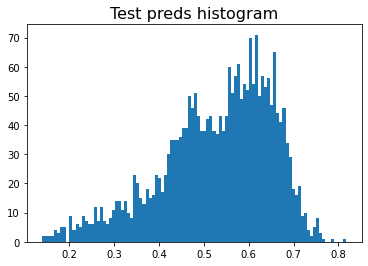

In [37]:
plt.hist(preds,bins=100)
plt.title('Test preds histogram',size=16)
plt.show()

# Create Submission CSV
There are 2413 rows in test data. Among these, 2336 that are `edit mutations` and 77 are `delete mutations`. Our trained model can only predict `edit mutations`, so will set all `delete mutations` to the mean `edit mutation` prediction below.

In [38]:
sub = pd.read_csv('../input/novozymes-enzyme-stability-prediction/sample_submission.csv')
sub.tm = preds
sub.loc[sub.seq_id.isin(deletions),'tm'] = sub.loc[~sub.seq_id.isin(deletions),'tm'].mean()
sub.to_csv(f'submission_ver{VER}.csv',index=False)
sub.head()

,seq_id,tm
0,31390,0.608652
1,31391,0.583849
2,31392,0.528280
3,31393,0.693516
4,31394,0.714240
